In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/True.csv
/kaggle/input/fake-news/Fake.csv


In [2]:
true_df = pd.read_csv("/kaggle/input/fake-news/True.csv", on_bad_lines='skip')
fake_df = pd.read_csv("/kaggle/input/fake-news/Fake.csv", on_bad_lines='skip')

In [3]:
true_df['label'] = 1  # True news
fake_df['label'] = 0  # Fake news

In [4]:
data = pd.concat([true_df, fake_df], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
import re
import string

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    return text

data['text'] = data['text'].apply(clean_text)

In [6]:
max_words = 10000
max_len = 300
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
y = data['label'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 46s 88ms/step - accuracy: 0.8279 - loss: 0.3100 - val_accuracy: 0.9972 - val_loss: 0.0095
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9989 - val_loss: 0.0075
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.9981 - loss: 0.0062 - val_accuracy: 0.9975 - val_loss: 0.0109
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9975 - val_loss: 0.0138
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 44s 86ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9981 - val_loss: 0.0118


In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9983 - loss: 0.0096
Test Accuracy: 0.9986


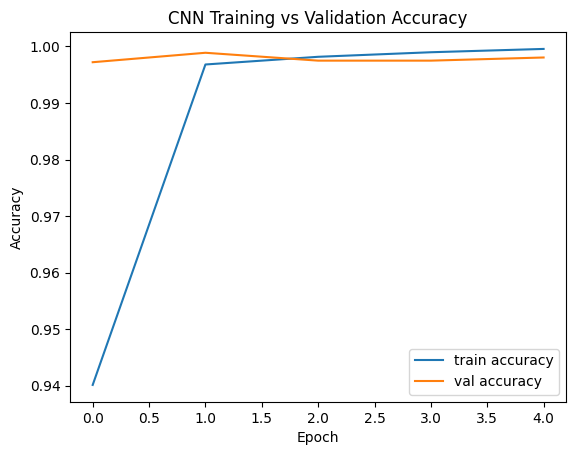

In [15]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training vs Validation Accuracy')
plt.legend()
plt.show()